In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load file
df_cholesterol = pd.read_csv('./datasets/cholesterol_dataset.csv')

In [10]:
# Check file
df_cholesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   blood_type         996 non-null    object 
 1   smoker             997 non-null    object 
 2   activity_level     996 non-null    object 
 3   age                997 non-null    float64
 4   weight             997 non-null    float64
 5   height             997 non-null    float64
 6   cholesterol_level  1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [6]:
# Remove Id column
df_cholesterol.drop(columns=['Id'], axis=1, inplace=True)

In [9]:
# Rename columns
df_cholesterol.columns = [
  "blood_type",
  "smoker",
  "activity_level",
  "age",
  "weight",
  "height",
  "cholesterol_level"
]

In [11]:
# Copy DF to EDA DF
df_cholesterol_eda =  df_cholesterol.copy()

In [12]:
# Copy DF to Bucketing DF
df_cholesterol_bucketing =  df_cholesterol.copy()

### EDA

In [13]:
# Visualize data
df_cholesterol_eda.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol_level
0,B,Yes,Low,33.0,85.1,186.0,199.63
1,A,No,Moderate,68.0,105.0,184.0,236.98
2,O,No,High,25.0,64.8,180.0,161.79
3,A,No,High,43.0,120.2,167.0,336.24
4,AB,No,Low,79.0,88.5,175.0,226.23
5,B,No,Low,68.0,66.8,170.0,185.31
6,A,Yes,Low,60.0,117.3,181.0,289.33
7,O,Yes,Moderate,35.0,86.9,174.0,216.48
8,O,No,Low,62.0,81.3,166.0,235.30
9,B,Yes,High,44.0,32.7,165.0,97.79


In [16]:
df_cholesterol_eda.activity_level.unique()

array(['Low', 'Moderate', 'High', nan], dtype=object)

In [28]:
df_cholesterol_eda.isna().sum()

blood_type           0
smoker               0
activity_level       0
age                  0
weight               0
height               0
cholesterol_level    0
dtype: int64

In [18]:
# Metrics of the DF
df_cholesterol_eda.describe()

,age,weight,height,cholesterol_level
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [19]:
# Collect metrics from categorical variables
mode_blood_type = df_cholesterol_eda.blood_type.mode()
mode_smoker = df_cholesterol_eda.smoker.mode()
mode_activity_level = df_cholesterol_eda.activity_level.mode()

In [20]:
# Collect metrics from numeric variables
median_age = df_cholesterol_eda.age.median()
median_weight = df_cholesterol_eda.weight.median()
median_height = df_cholesterol_eda.height.median()

In [27]:
# Input missing values
df_cholesterol_eda.fillna(value={'blood_type': mode_blood_type[0],
                                 'smoker': mode_smoker[0],
                                 'activity_level': mode_activity_level[0],
                                 'age': median_age,
                                 'weight': median_weight,
                                 'height': median_height,
                                 }, inplace=True)

In [29]:
# Convert age and height to integer
df_cholesterol_eda.age = df_cholesterol_eda.age.astype(int)
df_cholesterol_eda.height = df_cholesterol_eda.height.astype(int)

In [38]:
# Dataframe structure
df_cholesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   blood_type         963 non-null    object 
 1   smoker             963 non-null    object 
 2   activity_level     963 non-null    object 
 3   age                963 non-null    int64  
 4   weight             963 non-null    float64
 5   height             963 non-null    int64  
 6   cholesterol_level  963 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.2+ KB


In [31]:
# Visualize data
df_cholesterol_eda.head(10)

,blood_type,smoker,activity_level,age,weight,height,cholesterol_level
0,B,Yes,Low,33,85.1,186,199.63
1,A,No,Moderate,68,105.0,184,236.98
2,O,No,High,25,64.8,180,161.79
3,A,No,High,43,120.2,167,336.24
4,AB,No,Low,79,88.5,175,226.23
5,B,No,Low,68,66.8,170,185.31
6,A,Yes,Low,60,117.3,181,289.33
7,O,Yes,Moderate,35,86.9,174,216.48
8,O,No,Low,62,81.3,166,235.30
9,B,Yes,High,44,32.7,165,97.79


<Axes: xlabel='age'>

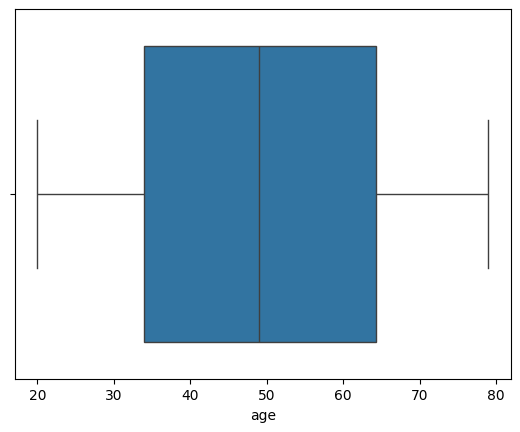

In [ ]:
# Verify / detect age outliers
sns.boxplot(data=df_cholesterol_eda, x='age')

<Axes: xlabel='weight'>

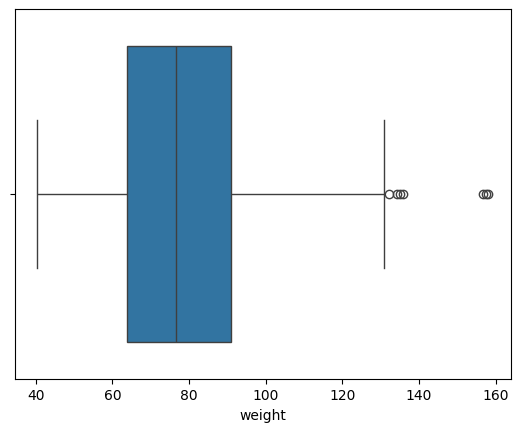

In [39]:
# Verify / detect weight outliers
sns.boxplot(data=df_cholesterol_eda, x='weight')

In [35]:
# Filter public to be removed
df_cholesterol_eda[df_cholesterol_eda['weight'] < 40].weight.count()

np.int64(37)

In [37]:
# Remove public
df_cholesterol_eda.drop(df_cholesterol_eda[df_cholesterol_eda['weight'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='height'>

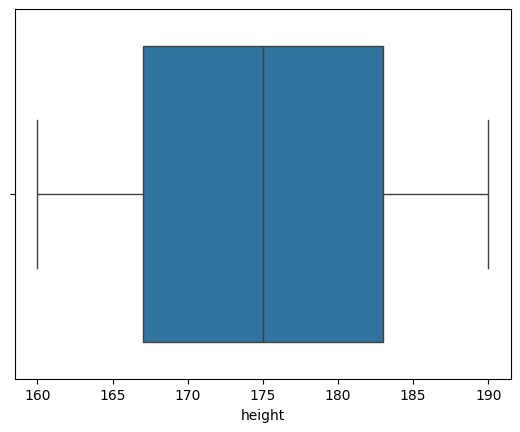

In [40]:
# Verify / detect height outliers
sns.boxplot(data=df_cholesterol_eda, x='height')

<Axes: xlabel='cholesterol_level'>

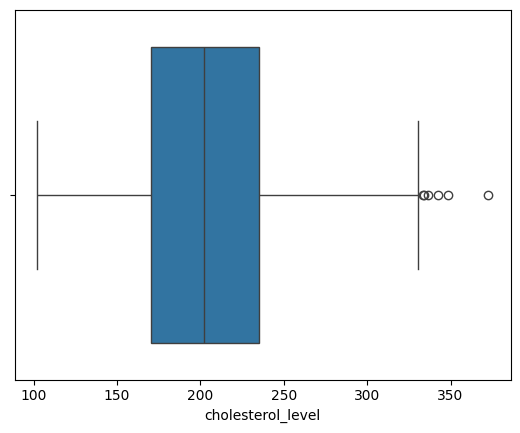

In [41]:
# Verify / detect cholesterol_level outliers
sns.boxplot(data=df_cholesterol_eda, x='cholesterol_level')